# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

Par Omar Galarraga et Sonia Garcia

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

2024-05-16 23:00:43.485513: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 23:00:44.027181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


A manière d'exemple, nous afficherons 3 images de chaque classe :

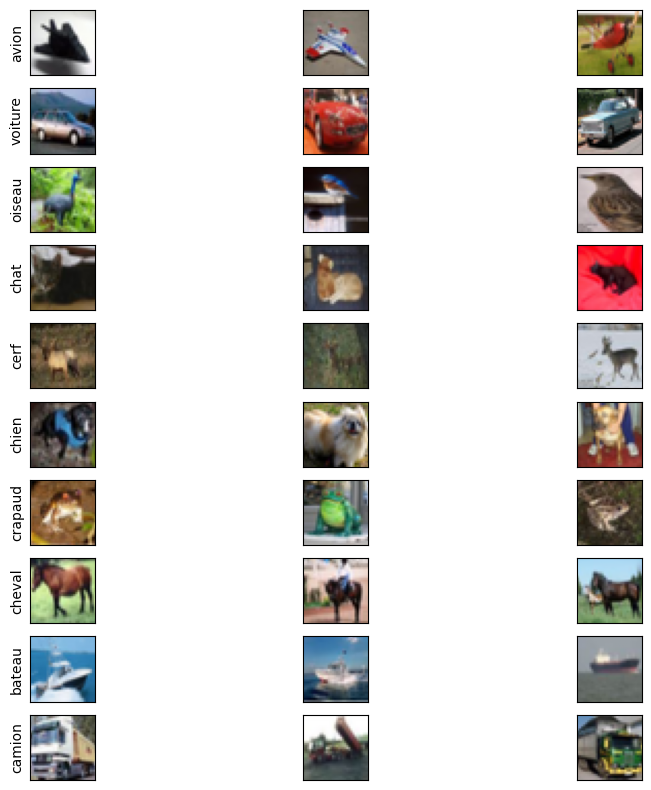

In [2]:
import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 3

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()


## Partie I. *Feedforward Neural Network* à une seule couche cachée

Nous construisons un réseau de neurones avec $N_{H_l} = 1$ couche cachée et $m=32$ neurones dans la couche cachée. 

* I.1) Si on considère les images "brutes", quelle est la dimension de la "couche" d'entrée ?

    ***Réponse:***
    The dimention of the input layer is $32*32$ RGB which is $ 32*32*3 = 3072$ 
    
* I.2) Quelle est la performance du modèle sur les ensembles d'apprentissage et de test ?

In [3]:
data_train[0].shape

(32, 32, 3)

In [4]:
m=32
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape)) #convert the multi-demensional neurol into the 1D vector 
refmodel.add(Dense(m, activation='sigmoid'))
refmodel.add(Dense(len(classes)))

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-16 23:00:54.427618: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 23:00:54.450303: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 23:00:54.450351: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built

Epoch 1/20


I0000 00:00:1715893256.139641    3419 service.cc:145] XLA service 0x7f3a68006ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715893256.139686    3419 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-05-16 23:00:56.150954: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-16 23:00:56.198682: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


123/782 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1817 - loss: 2.2170

I0000 00:00:1715893256.863838    3419 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2688 - loss: 2.0384 - val_accuracy: 0.3386 - val_loss: 1.8503
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3653 - loss: 1.7916 - val_accuracy: 0.3839 - val_loss: 1.7285
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3980 - loss: 1.7127 - val_accuracy: 0.4143 - val_loss: 1.6755
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4108 - loss: 1.6715 - val_accuracy: 0.4163 - val_loss: 1.6583
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4202 - loss: 1.6440 - val_accuracy: 0.4235 - val_loss: 1.6362
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4298 - loss: 1.6189 - val_accuracy: 0.4172 - val_loss: 1.6293
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4337 - loss: 1.5965 - val_accuracy: 0.4358 - val_loss: 1.6087
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4448 - loss: 1.5776 - val_accuracy: 0.4350 - val_

In [5]:
print("Final Training Accuracy: ", history1.history['accuracy'][-1])
print("Final Validation Accuracy: ", history1.history['val_accuracy'][-1])

Final Training Accuracy:  0.48221999406814575
Final Validation Accuracy:  0.4472000002861023


Optimisez le nombre de neurones dans la couche cachée dans l'intervalle $m = \left[2,128\right]$
* I.3) Quelle est la valeur optimale de $ m $ ?
* I.4) Quelles sont les nouvelles performances en apprentissage et en test ?

In [ ]:
#Ecrivez votre code ici
acc_train = []
acc_test = []
start = 2
end = 128
m_list = list(range(start,end + 1))
for m in m_list:
    refmodel = tf.keras.Sequential()
    refmodel.add(Flatten(input_shape=data_train[0].shape))
    refmodel.add(Dense(m, activation='sigmoid'))
    refmodel.add(Dense(len(classes)))

    refmodel.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    refmodel.fit(data_train, target_train, epochs=20, 
                            validation_data=(data_test, target_test), batch_size=64)
    acc_train.append(refmodel.evaluate(data_train, target_train)[1])
    acc_test.append(refmodel.evaluate(data_test, target_test)[1])
    
print("Avec les performances de test:")
m_opt = m_list[acc_test.index(max(acc_test))]
print('- m_opt =', m_opt)
print('- La moyenne des performances de la validation croisée de m_opt =', max(acc_test))

In [ ]:
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape)) #convert the multi-demensional neurol into the 1D vector 
refmodel.add(Dense(m_opt, activation='sigmoid'))
refmodel.add(Dense(len(classes)))

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

In [ ]:
print("Final Training Accuracy: ", history.history['accuracy'][-1])
print("Final Validation Accuracy: ", history.history['val_accuracy'][-1])

Montrez la matrice de confusion du modèle optimal sur l'ensemble de test

* I.4) Quelle est la prédiction "préférée" du modèle ?
* I.5) Quelle est la classe la mieux prédite ? Justifiez brièvement

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


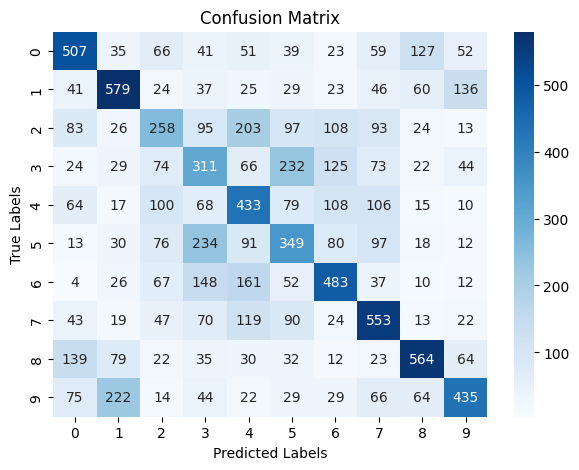

Prédiction préférée du modèle (classe la plus fréquemment prédite): 4
Classe la mieux prédite (plus haute précision): 1


In [6]:
#Ecrivez votre code ici
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que model est le modèle optimal obtenu précédemment
y_test_predictions = refmodel.predict(data_test)
predicted_classes = np.argmax(y_test_predictions, axis=1)

# Calcul de la matrice de confusion
cm = confusion_matrix(target_test, predicted_classes)

# Visualisation de la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyse pour trouver la prédiction préférée et la classe la mieux prédite
most_predicted_class = np.argmax(np.sum(cm, axis=0))
best_predicted_class = np.argmax(cm.diagonal() / np.sum(cm, axis=1))

print(f"Prédiction préférée du modèle (classe la plus fréquemment prédite): {most_predicted_class}")
print(f"Classe la mieux prédite (plus haute précision): {best_predicted_class}")


## Partie II. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

* II.1) Combien de paramètres sont-ils optimisés au total ? \
***Réponse:*** In total there are 198,614 optimizer parameters.
* II.2) Quelle est la performance en apprentissage et validation ?
* II.3) Montrez la matrice de confusion

In [11]:
#Ecrivez votre code ici
fnn = tf.keras.Sequential()
fnn.add(Flatten(input_shape=data_train[0].shape))
fnn.add(Dense(32, activation='relu'))
fnn.add(Dense(16, activation='relu'))
fnn.add(Dense(16, activation='relu'))
fnn.add(Dense(len(classes)))

fnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history2 = fnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))
print(fnn.summary())

/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2182 - loss: 2.0588 - val_accuracy: 0.3325 - val_loss: 1.8414
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3260 - loss: 1.8528 - val_accuracy: 0.3398 - val_loss: 1.8039
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3490 - loss: 1.7988 - val_accuracy: 0.3289 - val_loss: 1.8816
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3530 - loss: 1.7805 - val_accuracy: 0.3616 - val_loss: 1.7571
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3576 - loss: 1.7709 - val_accuracy: 0.3499 - val_loss: 1.7800
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3611 - loss: 1.7585 - val_accuracy: 0.3548 - val_loss: 1.7619
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3711 - loss: 1.7353 - val_accuracy: 0.3521 - val_loss: 1.7784
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3666 - loss: 1.7405 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │        98,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,920 (1.14 MB)

 Trainable params: 99,306 (387.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,614 (775.84 KB)

None


In [12]:
print(f"Final Training Accuracy: {history2.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history2.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.38589999079704285
Final Validation Accuracy: 0.3779999911785126


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


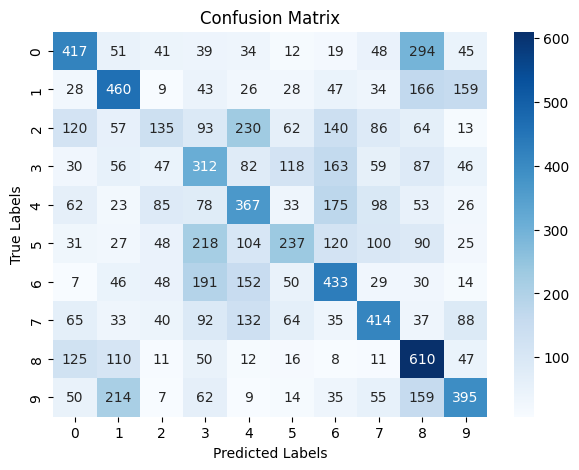

Prédiction préférée du modèle (classe la plus fréquemment prédite): 8
Classe la mieux prédite (plus haute précision): 8


In [13]:
prediction_list = fnn.predict(data_test)
prediction = [np.argmax(prob_list) for prob_list in prediction_list]

# Calcul de la matrice de confusion
cm = confusion_matrix(target_test, prediction)

# Visualisation de la matrice de confusion
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyse pour trouver la prédiction préférée et la classe la mieux prédite
most_predicted_class = np.argmax(np.sum(cm, axis=0))
best_predicted_class = np.argmax(cm.diagonal() / np.sum(cm, axis=1))

print(f"Prédiction préférée du modèle (classe la plus fréquemment prédite): {most_predicted_class}")
print(f"Classe la mieux prédite (plus haute précision): {best_predicted_class}")


## Partie III. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [14]:
#Ecrivez votre code ici
cnn = tf.keras.Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64,activation='softmax'))
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history3 = cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))
print(cnn.summary())

/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3427 - loss: 1.8330 - val_accuracy: 0.5453 - val_loss: 1.2989
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5802 - loss: 1.1894 - val_accuracy: 0.6206 - val_loss: 1.0842
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6387 - loss: 1.0244 - val_accuracy: 0.6485 - val_loss: 0.9948
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6791 - loss: 0.9174 - val_accuracy: 0.6731 - val_loss: 0.9524
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7100 - loss: 0.8349 - val_accuracy: 0.6814 - val_loss: 0.9242
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7291 - loss: 0.7810 - val_accuracy: 0.6960 - val_loss: 0.8894
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7407 - loss: 0.7403 - val_accuracy: 0.7110 - val_loss: 0.8532
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7608 - loss: 0.6915 - val_accurac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        65,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,762 (1.40 MB)

 Trainable params: 121,920 (476.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,842 (952.51 KB)

None


* III.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?

***Réponse:***
first layer Conv2D = $30 \times 30 \times 32$ \
first layer Maxpooling2D = $15 \times 15 \times 32$ \
Second layer Conv2D = $13 \times 13 \times 64$ \
Second layer Maxpooling2D = $6 \times 6 \times 64$ \
Third layer Conv2D = $4 \times 4 \times 64 = 1024$
* III.2) Combien de paramètres sont-ils entraînés au total ?

***Réponse:*** 121,920
* III.3) Quelle est la performance d'apprentissage et de validation ?

In [15]:
#Ecrivez votre code ici
print(f"Final Training Accuracy: {history3.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history3.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.8523399829864502
Final Validation Accuracy: 0.6991999745368958


## Partie IV. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [16]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*) 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)

In [17]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

Epoch 1/20


I0000 00:00:1715893955.733271   12709 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_16729', 52 bytes spill stores, 52 bytes spill loads

I0000 00:00:1715893955.816728   12700 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_16729', 352 bytes spill stores, 352 bytes spill loads

I0000 00:00:1715893966.424883    3418 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_36', 4 bytes spill stores, 4 bytes spill loads



1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4432 - loss: 1.8257

I0000 00:00:1715894000.108380   13089 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_16729', 52 bytes spill stores, 52 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.4433 - loss: 1.8254 - val_accuracy: 0.1413 - val_loss: 35.3041
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3820 - loss: 1.9434 - val_accuracy: 0.4255 - val_loss: 1.9394
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4861 - loss: 1.5319 - val_accuracy: 0.4307 - val_loss: 1.7254
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5712 - loss: 1.3034 - val_accuracy: 0.5695 - val_loss: 1.4528
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6261 - loss: 1.0839 - val_accuracy: 0.5908 - val_loss: 1.3408
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6995 - loss: 0.8823 - val_accuracy: 0.6182 - val_loss: 1.1268
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7420 - loss: 0.7563 - val_accuracy: 0.6124 - val_loss: 1.1839
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7788 - loss: 0.6

In [18]:
print(f"Final Training Accuracy: {history4.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history4.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.9582800269126892
Final Validation Accuracy: 0.7598000168800354


In [19]:
performance_data = [
    {"Classifieur": "*FNN* simple ", "Perf Apprentissage": round(history1.history['accuracy'][-1], 4), "Perf Test": round(history1.history['val_accuracy'][-1], 4)},
    {"Classifieur": "*FNN* profond", "Perf Apprentissage": round(history2.history['accuracy'][-1], 4), "Perf Test": round(history2.history['val_accuracy'][-1], 4)},
    {"Classifieur": "*CNN*        ", "Perf Apprentissage": round(history3.history['accuracy'][-1], 4), "Perf Test": round(history3.history['val_accuracy'][-1], 4)},
    {"Classifieur": "*ResNet50*   ", "Perf Apprentissage": round(history4.history['accuracy'][-1], 4), "Perf Test": round(history4.history['val_accuracy'][-1], 4)},
]

def update_performance(classifier, perf_apprentissage, perf_test):
    for item in performance_data:
        if item["Classifieur"] == classifier:
            item["Perf Apprentissage"] = round(perf_apprentissage, 4)
            item["Perf Test"] = round(perf_test, 4)
            break

def generate_markdown_table(data):
    table = "| Classifieur         | Perf Apprentissage | Perf Test | \n"
    table += "|---------------------|--------------------|-----------|\n"
    for item in data:
        table += f"| {item['Classifieur']}       |       {item['Perf Apprentissage']:.4f}       |   {item['Perf Test']:.4f}  | \n"
    return table

print("Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées. \n")

markdown_table = generate_markdown_table(performance_data)
print(markdown_table)

Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées. 

| Classifieur         | Perf Apprentissage | Perf Test | 
|---------------------|--------------------|-----------|
| *FNN* simple        |       0.4822       |   0.4472  | 
| *FNN* profond       |       0.3859       |   0.3780  | 
| *CNN*               |       0.8523       |   0.6992  | 
| *ResNet50*          |       0.9583       |   0.7598  | 



* IV.1) Quel est le meilleur classifieur ? Justifiez

  ***Réponse:***
    According to the table above, ResNet50 is the best classifier. 


IV.2) Pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné. 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)  

In [39]:
from tensorflow.keras.applications import ConvNeXtLarge

#There are 3 model ConveNet which is ConvNeXtBase, ConvNeXtLarge, ConvNeXtXLarge

ConvNet_model = ConvNeXtLarge(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ConvNet_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
#tl_cnn.summary()

In [40]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history5 = tl_cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

Epoch 1/20


/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1715717541.792288   32679 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1715717541.856748   32684 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1715717541.894266   32690 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 76 bytes spill stores, 208 bytes spill loads

I0000 00:00:1715717542.090116   32687 asm_compiler.cc:369] ptxas warning : Registers ar

1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1020 - loss: 2.3794

I0000 00:00:1715717681.177763   33852 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_78', 476 bytes spill stores, 480 bytes spill loads

I0000 00:00:1715717683.409326   33856 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 164 bytes spill stores, 164 bytes spill loads

I0000 00:00:1715717683.499640   33852 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_132', 700 bytes spill stores, 700 bytes spill loads

I0000 00:00:1715717683.506902   33849 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1715717684.661751   33857 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1715717684.768504   3384

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 94ms/step - accuracy: 0.1020 - loss: 2.3793 - val_accuracy: 0.1000 - val_loss: 2.3232
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.1030 - loss: 2.3162 - val_accuracy: 0.1000 - val_loss: 2.3156
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.0996 - loss: 2.3122 - val_accuracy: 0.1000 - val_loss: 2.3125
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.1026 - loss: 2.3108 - val_accuracy: 0.1000 - val_loss: 2.3181
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.1001 - loss: 2.3098 - val_accuracy: 0.1000 - val_loss: 2.3114
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.1017 - loss: 2.3075 - val_accuracy: 0.1000 - val_loss: 2.3049
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.0989 - loss: 2.3053 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.0975 - lo

In [42]:
print(f"Final Training Accuracy: {history5.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history5.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.09914000332355499
Final Validation Accuracy: 0.10000000149011612


In [44]:
from tensorflow.keras.applications import ConvNeXtBase

ConvNet_model = ConvNeXtBase(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ConvNet_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [45]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history6 = tl_cnn.fit(data_train, target_train, epochs=20, validation_data=(data_test, target_test))

Epoch 1/20


/home/menghor-thuo/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1715721070.673867   58192 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1715721070.690913   58207 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 80 bytes spill stores, 124 bytes spill loads

I0000 00:00:1715721071.009519   58201 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1715721071.282450   58198 asm_compiler.cc:369] ptxas warning : Registe

1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1023 - loss: 2.4401

I0000 00:00:1715721184.159269   59169 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1715721184.292972   59161 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 64 bytes spill stores, 64 bytes spill loads

I0000 00:00:1715721186.203175   59169 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_74', 48 bytes spill stores, 48 bytes spill loads

I0000 00:00:1715721189.926204   59160 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_72', 48 bytes spill stores, 48 bytes spill loads

2024-05-14 23:13:12.392870: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.24GiB with freed_by_count=0. The caller indicates that this is not a failure, but this ma

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 86ms/step - accuracy: 0.1023 - loss: 2.4400 - val_accuracy: 0.1000 - val_loss: 2.3270
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.0997 - loss: 2.3404 - val_accuracy: 0.1000 - val_loss: 2.3448
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.1003 - loss: 2.3216 - val_accuracy: 0.1000 - val_loss: 2.3126
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.1000 - loss: 2.3132 - val_accuracy: 0.1000 - val_loss: 2.3105
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.0978 - loss: 2.3088 - val_accuracy: 0.1000 - val_loss: 2.3112
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.0991 - loss: 2.3063 - val_accuracy: 0.1000 - val_loss: 2.3058
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.1001 - loss: 2.3049 - val_accuracy: 0.1000 - val_loss: 2.3090
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.0961 - loss: 2.3

In [46]:
print(f"Final Training Accuracy: {history6.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history6.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.09995999932289124
Final Validation Accuracy: 0.10000000149011612


In [74]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history7 = tl_cnn.fit(data_train, target_train, epochs=3, validation_data=(data_test, target_test))

In [ ]:
print(f"Final Training Accuracy: {history7.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history7.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.09914000332355499
Final Validation Accuracy: 0.10000000149011612


##### Conclusion: The results for both the ConvNetLarge and ConvNetBase models are unsatisfactory, even with a small number of epochs. The training performance is 0.099, and the test performance is 0.100.